# Clour channels and colour spaces

In this example, we will view the different channels in an image and perform conversion to multiple colour spaces.

## Change working directory (can also be changed from terminal if working locally)

Change working directory to directory containing the notebook and images (e.g. is using Google Colab)

In [120]:
# cce3207-venv


## Load and display images

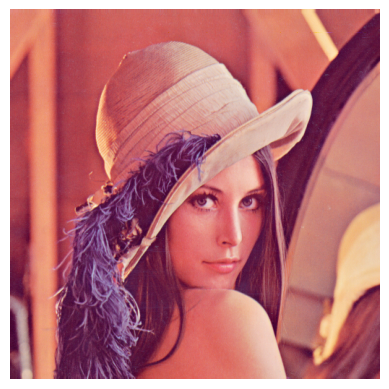

In [121]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt

filename1 = 'lena.png'

# Load the images
I = imageio.imread(filename1)

plt.figure()
plt.axis('off')
plt.imshow(I)

## Display the colour channels of the image

Check the shape of the image object

In [122]:
print(I.shape)

(512, 512, 3)


Function to display each channel for a given input image

In [123]:
def show_channels(I):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for i in range(3):
        axs[i].imshow(I[:, :, i], cmap='gray')
        axs[i].axis('off')
    plt.show()

Run the function for lena.jpg

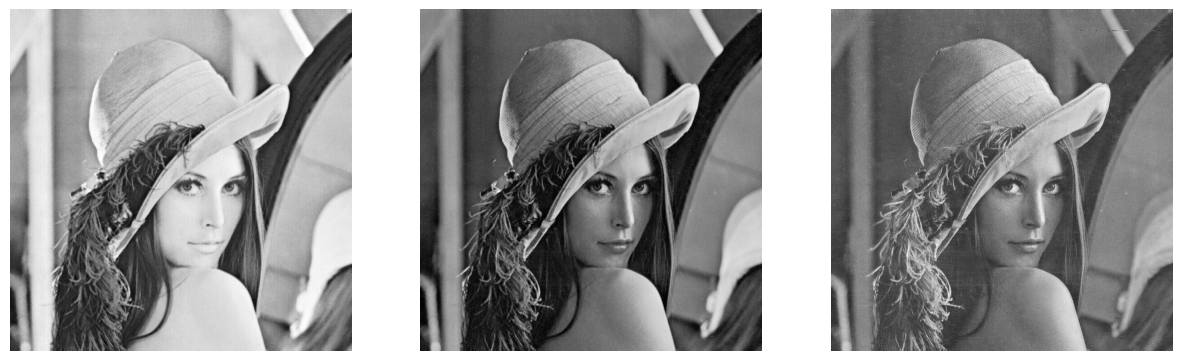

In [124]:
show_channels(I)

## Colour space conversions

Show possible colour space conversions using OpenCV

In [125]:
import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
for f in flags:
  print(f)

COLOR_BAYER_BG2BGR
COLOR_BAYER_BG2BGRA
COLOR_BAYER_BG2BGR_EA
COLOR_BAYER_BG2BGR_VNG
COLOR_BAYER_BG2GRAY
COLOR_BAYER_BG2RGB
COLOR_BAYER_BG2RGBA
COLOR_BAYER_BG2RGB_EA
COLOR_BAYER_BG2RGB_VNG
COLOR_BAYER_BGGR2BGR
COLOR_BAYER_BGGR2BGRA
COLOR_BAYER_BGGR2BGR_EA
COLOR_BAYER_BGGR2BGR_VNG
COLOR_BAYER_BGGR2GRAY
COLOR_BAYER_BGGR2RGB
COLOR_BAYER_BGGR2RGBA
COLOR_BAYER_BGGR2RGB_EA
COLOR_BAYER_BGGR2RGB_VNG
COLOR_BAYER_GB2BGR
COLOR_BAYER_GB2BGRA
COLOR_BAYER_GB2BGR_EA
COLOR_BAYER_GB2BGR_VNG
COLOR_BAYER_GB2GRAY
COLOR_BAYER_GB2RGB
COLOR_BAYER_GB2RGBA
COLOR_BAYER_GB2RGB_EA
COLOR_BAYER_GB2RGB_VNG
COLOR_BAYER_GBRG2BGR
COLOR_BAYER_GBRG2BGRA
COLOR_BAYER_GBRG2BGR_EA
COLOR_BAYER_GBRG2BGR_VNG
COLOR_BAYER_GBRG2GRAY
COLOR_BAYER_GBRG2RGB
COLOR_BAYER_GBRG2RGBA
COLOR_BAYER_GBRG2RGB_EA
COLOR_BAYER_GBRG2RGB_VNG
COLOR_BAYER_GR2BGR
COLOR_BAYER_GR2BGRA
COLOR_BAYER_GR2BGR_EA
COLOR_BAYER_GR2BGR_VNG
COLOR_BAYER_GR2GRAY
COLOR_BAYER_GR2RGB
COLOR_BAYER_GR2RGBA
COLOR_BAYER_GR2RGB_EA
COLOR_BAYER_GR2RGB_VNG
COLOR_BAYER_GRBG2BGR
COL

### Convert to Grayscale

Perform the conversion

In [126]:
I_gray = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

Show the image

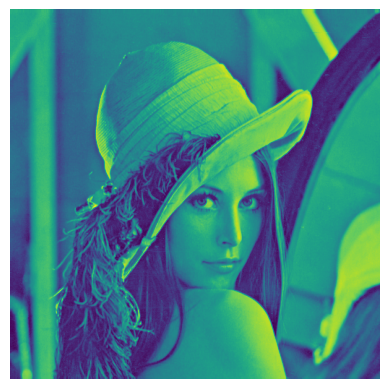

In [127]:
plt.figure()
plt.axis('off')
plt.imshow(I_gray)
plt.show()


Since the image only has one channel, the default colourmap ('viridis') is used when showing the image. More information at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html and https://matplotlib.org/stable/users/explain/colors/colormaps.html

Hence, use the grayscale colourmap in `imshow()` to display the image. Remember to use the `vmin` and `vmax` options!

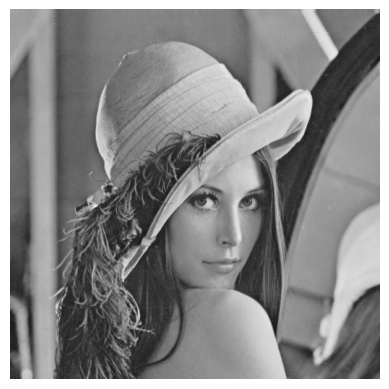

In [128]:
plt.figure()
plt.axis('off')
plt.imshow(I_gray, cmap='gray', vmin=0, vmax=255)

What happens if we don't use the `vmin` and `vmax` options? 

The plt.imshow will try to estimate the vmin and vmax and if we have our largest image 10 in a [0,255] it might estimate 10 as vmax which is bad


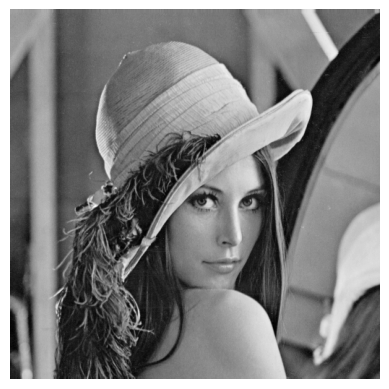

In [129]:
plt.figure()
plt.axis('off')
plt.imshow(I_gray, cmap='gray')

Display the image in grayscale, avoiding the use of the `cmap=gray` option

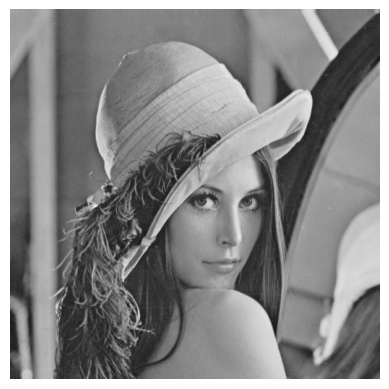

In [130]:
import numpy as np

# Since matplotlib assumes that we have an image with 3 channels, but we only
# have 1 channel, then simply replicate the same values across the three
# channels (this allows us to see the original values, instead of using the
# 'cmap=gray' option which does an internal conversion):

I_gray_rgb = np.stack([I_gray, I_gray, I_gray], axis=2)
plt.figure()
plt.axis('off')
plt.imshow(I_gray_rgb, vmin=0, vmax=255)


### Convert to YUV

Perform the conversion

In [131]:
I_yuv = cv2.cvtColor( I, cv2.COLOR_RGB2YUV )


Show the image

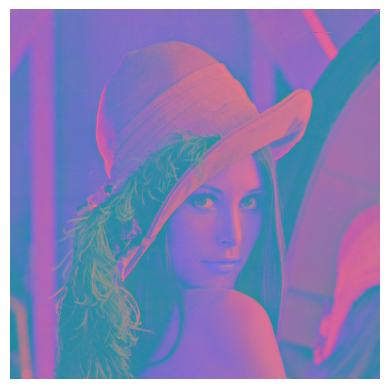

In [132]:
plt.figure()
plt.axis('off')
plt.imshow(I_yuv, vmin=0, vmax=255)

Show the individual channels

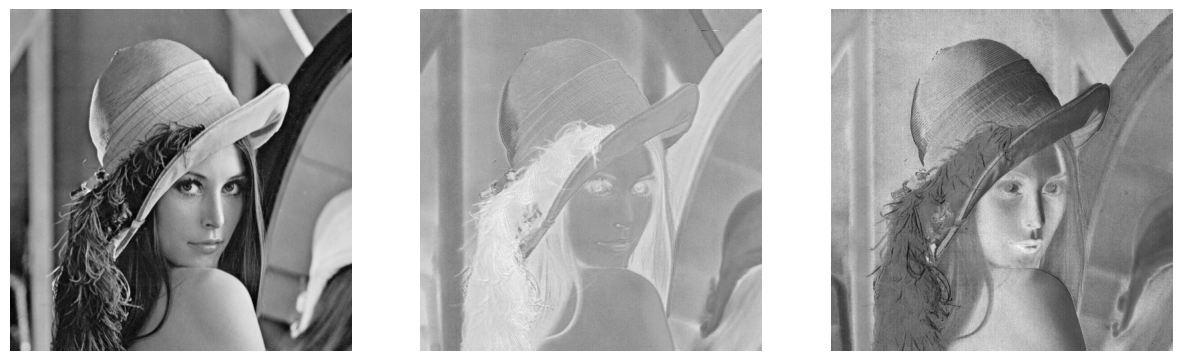

In [133]:
show_channels(I_yuv)

#### Compare the grayscale image with Y

Print the elements of the grayscale image

In [134]:
print(I_gray.shape)

(512, 512)


Print the elements of the 'Y' channel

In [135]:
print(I_yuv.shape)

(512, 512, 3)


Check if I_gray matches the 'Y' channel

In [136]:
I_yuv[:,:,0]==I_gray

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Check if all elements match

In [137]:
np.all(I_yuv[:,:,0]==I_gray)

np.False_

Find the indices where the images don't match

In [138]:
idx = I_yuv[:,:,0]!=I_gray


Check how many elements do not match

In [139]:
np.sum(idx)

np.int64(124)

Show these elements in the grayscale image

In [140]:
I_gray[idx]

array([156, 156, 156, 156, 156, 160, 159, 154, 154, 152, 154, 153, 154,
       158, 152, 162, 154, 159, 158, 151, 153, 156, 158, 155, 169, 224,
       164, 128, 223, 187, 119, 189,  88, 124, 213,  53,  58,  63,  42,
       217,  83,  50,  61,  79, 120,  65,  41,  49,  36,  61,  69, 201,
       202, 108, 201,  70, 203, 204, 206,  93,  61, 118,  58,  35, 207,
       141, 163,  43,  72, 151,  49,  77,  61, 160, 101, 163,  66, 207,
       182, 103, 181, 212, 210,  82, 210, 209, 208,  89,  42,  75,  82,
       212, 161,  85, 161,  82, 178,  74,  46,  96, 211,  45,  79,  93,
       157,  40,  34, 102,  89,  96, 158,  78,  91, 157, 158, 123,  89,
        83,  91,  98,  84,  50, 114,  83], dtype=uint8)

Show these elements in the Y channel

In [141]:
I_yuv[:,:,0][idx]

array([155, 155, 155, 155, 155, 159, 158, 153, 153, 151, 153, 152, 153,
       157, 151, 161, 153, 158, 157, 150, 152, 155, 157, 154, 168, 223,
       163, 129, 222, 186, 120, 188,  89, 125, 212,  54,  59,  64,  43,
       216,  84,  51,  62,  80, 121,  66,  42,  50,  37,  62,  70, 200,
       201, 109, 200,  71, 202, 203, 205,  94,  62, 119,  59,  36, 206,
       140, 162,  44,  73, 152,  50,  78,  62, 159, 102, 162,  67, 206,
       181, 104, 180, 211, 209,  83, 209, 208, 207,  90,  43,  76,  83,
       211, 160,  86, 160,  83, 177,  75,  47,  97, 210,  46,  80,  94,
       156,  41,  35, 103,  90,  97, 157,  79,  92, 156, 157, 124,  90,
        84,  92,  99,  85,  51, 115,  84], dtype=uint8)

#### Perform the RGB to YUV conversion manually (without using any in-built functions)

Perform the conversion

In [142]:
R = I[:,:,0]
G = I[:,:,1]
B = I[:,:,2]

Y = 0.299*R + 0.587*G + 0.114*B
U = 0.492*(B-Y)
V = 0.877*(R-Y)

I_yuv2 = np.zeros_like(I, dtype='uint8')
I_yuv2 = np.stack([Y, U, V], axis=2)


Show the individual channels in the image

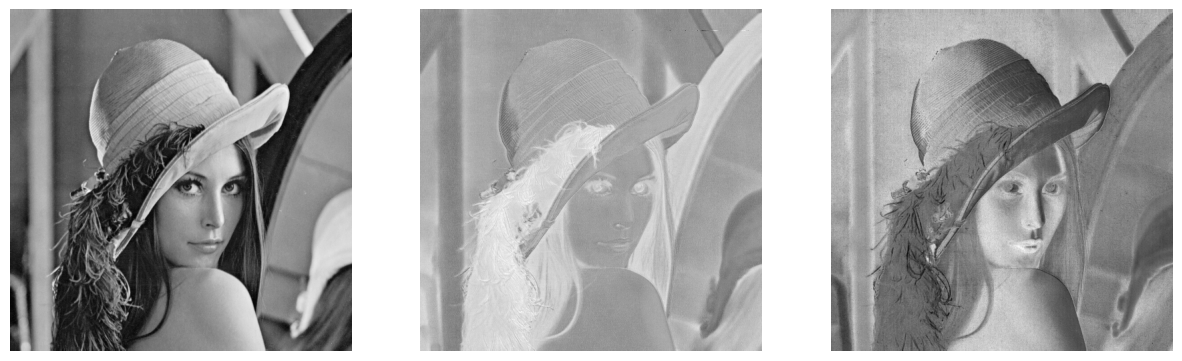

In [143]:
show_channels(I_yuv2)

#### Sub-sampling

Downscale the image by 2 (half the size), using OpenCV

In [144]:
I_yuv_downscaled = cv2.resize(I_yuv, (I_yuv.shape[1]//2, I_yuv.shape[0]//2), interpolation=cv2.INTER_LINEAR)

Check size of the new image

In [145]:
I_yuv_downscaled.shape

(256, 256, 3)

Upscale the image again to full size

In [146]:
I_yuv_upscaled = cv2.resize(I_yuv_downscaled, (I_yuv.shape[1], I_yuv.shape[0]), interpolation=cv2.INTER_LINEAR)

Show the individual channels in the image

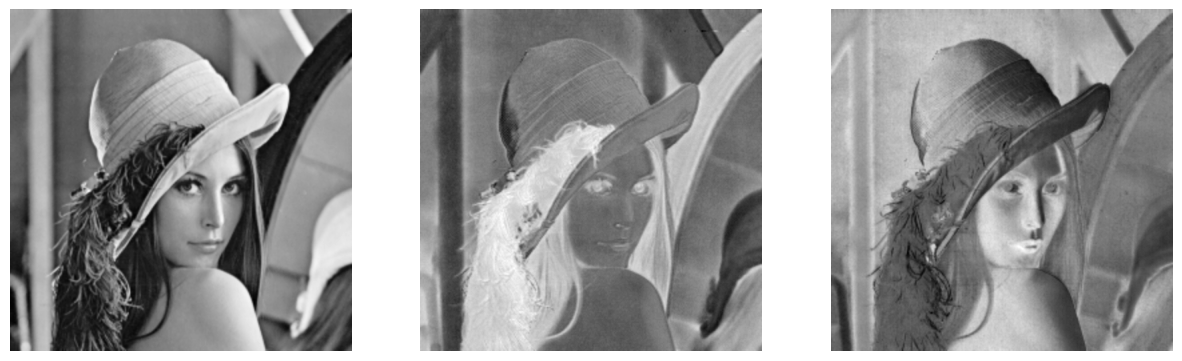

In [147]:
show_channels(I_yuv_upscaled)

Combine the U and V channels in the downscaled image with the original Y channel

In [148]:
I_yuv_new = np.zeros_like(I_yuv)
I_yuv_new =  np.stack([I_yuv2[:,:,0], I_yuv_upscaled[:,:,1], I_yuv_upscaled[:,:,2]], axis=2)
# Convert the values to int (since the resize operation may introduce small floating point errors)
I_yuv_new = np.round(I_yuv_new).astype('uint8')

Show the individual channels in the image

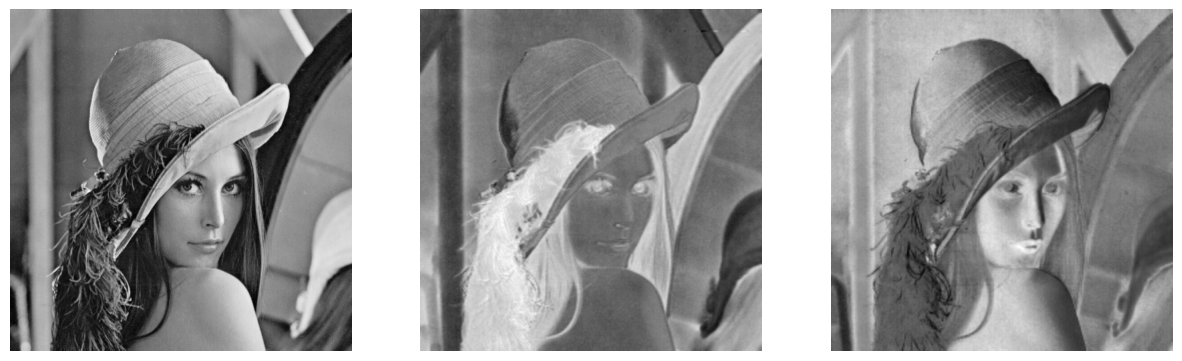

25 245


In [149]:
show_channels(I_yuv_new)
# Print the range of values in the image
print(np.min(I_yuv_new), np.max(I_yuv_new))

Show the image

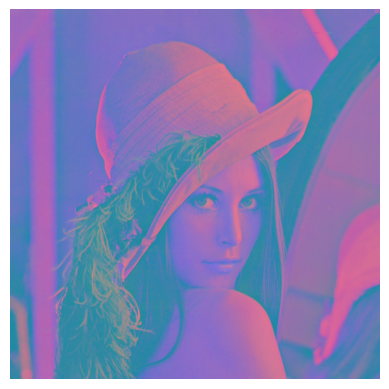

In [150]:
plt.figure()
plt.axis('off')
plt.imshow(I_yuv_new, vmin=0, vmax=255)

Convert to RGB

In [151]:
I_rgb_new = cv2.cvtColor(I_yuv_new, cv2.COLOR_YUV2RGB)


Show the image

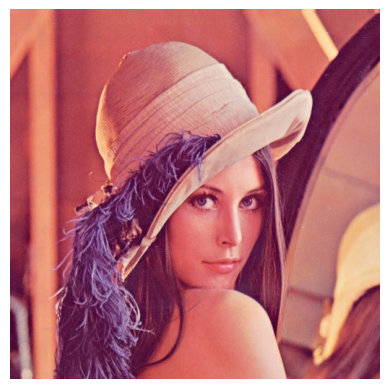

In [152]:
plt.figure()
plt.axis('off')
plt.imshow(I_rgb_new, vmin=0, vmax=255)

Compare the image visually with the original image (`I`)...what do you notice?

### Conversion to HSV

Perform the conversion

In [153]:
I_hsv = cv2.cvtColor(I, cv2.COLOR_RGB2HSV)

Show the image

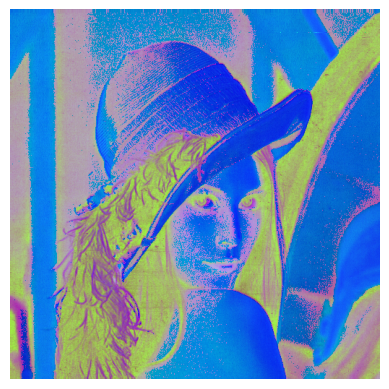

In [154]:
plt.figure()
plt.axis('off')
plt.imshow(I_hsv, vmin=0, vmax=255)

Show the individual channels

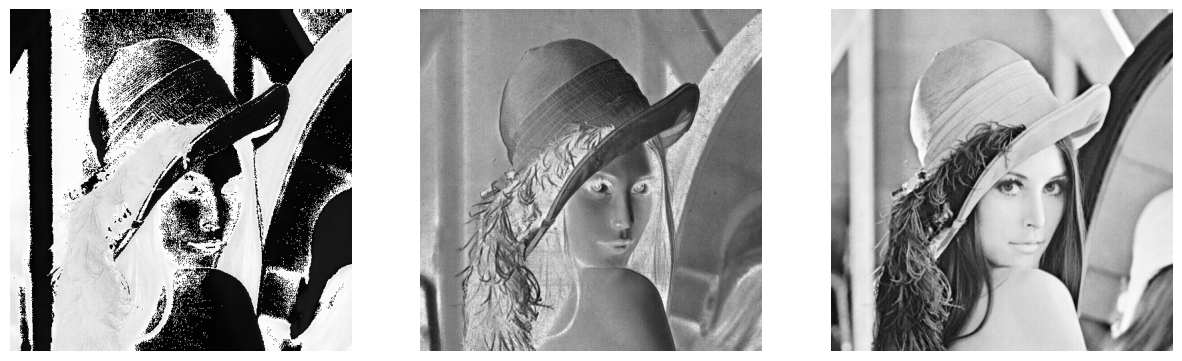

In [155]:
show_channels(I_hsv)